In [110]:
import numpy as np
import cv2
from scipy.spatial import distance
from scipy.ndimage.filters import convolve
from scipy.sparse import diags, csr_matrix
from scipy.sparse.linalg import spsolve
import argparse
from argparse import RawTextHelpFormatter
import glob
from os import makedirs
from os.path import join, exists, basename, splitext
import cv2
import matplotlib.pyplot as plt


In [109]:
def init_kernel(image_config):
    kernel = np.zeros((image_config["size"],image_config["size"]))
    for i in range(image_config["size"]):
        for j in range(image_config["size"]):
            G_pq = (distance.euclidean((i, j), (image_config["size"] // 2, image_config["size"] // 2)) ** 2)
            sig2 = (spatial_sigma ** 2)
            kernel[i, j] = np.exp(-0.5 *G_pq / sig2)
    return kernel


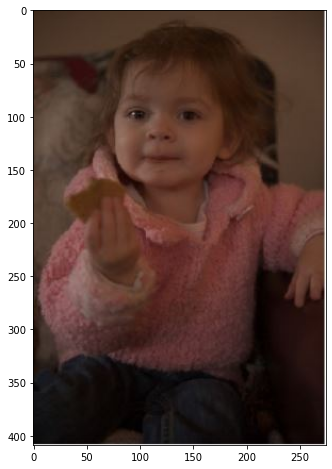

(15, 15)


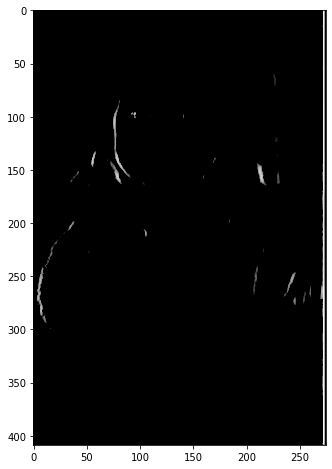

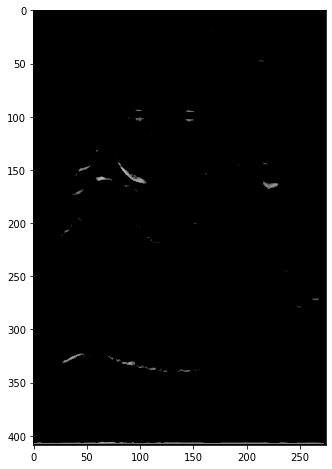

In [108]:
def correct_image():
    
    path="C:/Users/HP-PC/Downloads/Low-light-Image-Enhancement-master/ppt/"
    imgpath=path+"/under-exposed1.jpg"
    image = cv2.imread(imgpath)
    
    # create new directory for saving result
    directory = join(path, "improved")
    if not exists(directory):
        makedirs(directory)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 8))
    imgplot = plt.imshow(image)
    
    plt.show()
    enhanced_image = illuminate_image(image)
    
    name, ext = imgpath.split(".")
    cv2.imwrite(join(directory,"result."+ext), enhanced_image)
    
correct_image()
    

In [107]:
#default values
image_config={"be":1.0,"bs":1.0,"bc":1.0}
image_config["size"]=15
image_config["sigma"]=3
image_config["gamma"]=0.6
image_config["lamda"]=0.15
image_config["eps"]=1e-3
print(image_config)

{'be': 1.0, 'bs': 1.0, 'bc': 1.0, 'size': 15, 'sigma': 3, 'gamma': 0.6, 'lamda': 0.15, 'eps': 0.001}


In [106]:
def improved_L_map(L, image_config):
    
    Lp = cv2.Sobel(L, cv2.CV_64F, 1, 0, ksize=1)
    T = convolve(np.ones_like(L), kernel, mode='constant')
    T = T / (np.abs(convolve(Lp, kernel, mode='constant')) + image_config["eps"])
    wx=T / (np.abs(Lp) + image_config["eps"])
    wx1=255-wx
    plt.figure(figsize=(12, 8))
    imgplot = plt.imshow(wx1, cmap='gray', vmin=0, vmax=255)
    plt.show()
    Lp = cv2.Sobel(L, cv2.CV_64F, 0, 1, ksize=1)
    T = convolve(np.ones_like(L), kernel, mode='constant')
    T = T / (np.abs(convolve(Lp, kernel, mode='constant')) + image_config["eps"])
    wy=T / (np.abs(Lp) + image_config["eps"])
    
    wy1=255-wy
    plt.figure(figsize=(12, 8))
    imgplot = plt.imshow(wy1, cmap='gray', vmin=0, vmax=255)
    
    plt.show()
    return L

In [105]:
def forward_illumination(im,image_config):
    L = np.max(im, axis=-1)
    L_refined = improved_L_map(L, image_config)
    return im

In [104]:
def illuminate_image(image):
    kernel=init_kernel(image_config)
    print(kernel.shape)
    image_config["kernel"]=kernel
    im_normalized = image.astype(float) / 255.
    under_corrected = forward_illumination(im_normalized, image_config)
    return image

        
        